In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from mlscorecheck.auc import auc_from_sens_spec

In [34]:
results = []
for sens in [0.6, 0.7, 0.8, 0.9, 1.0]:
    for spec in np.linspace(0.5, 1.0, 20):
        scores = {
            'sens': sens,
            'spec': spec
        }
        for lmode in ['min', 'cmin']:
            for umode in ['max', 'amax']:
                for (p, n) in [(200, 800), (400, 600), (2000, 8000), (4000, 6000)]:
                    try:
                        interval = auc_from_sens_spec(
                            scores=scores,
                            eps=1e-4,
                            p=p,
                            n=n,
                            lower=lmode,
                            upper=umode
                        )
                        results.append((sens, spec, interval[0], interval[1], (interval[1] - interval[0]), lmode, umode, p, n))
                    except:
                        pass

In [35]:
data = pd.DataFrame(results, columns=['sens', 'spec', 'int0', 'int1', 'diff', 'lower', 'upper', 'p', 'n'])

In [36]:
sens = 0.7
p = 200
n = 800

def plot(sens, p, n, filename):
    plt.figure(figsize=(6, 3))

    tmp = data[(data['sens'] == sens) & (data['p'] == p) & (data['n'] == n)]

    tmp1 = tmp[(tmp['lower'] == 'min') & (tmp['upper'] == 'max')]
    plt.plot(tmp1['spec'], tmp1['diff']/2, label='(min, max)', ls='solid', color='black')

    tmp1 = tmp[(tmp['lower'] == 'cmin') & (tmp['upper'] == 'max')]
    plt.plot(tmp1['spec'], tmp1['diff']/2, label='(cmin, max)', ls='dashed', color='black')

    tmp1 = tmp[(tmp['lower'] == 'min') & (tmp['upper'] == 'amax')]
    plt.plot(tmp1['spec'], tmp1['diff']/2, label='(min, amax)', ls='-.', color='black')

    tmp1 = tmp[(tmp['lower'] == 'cmin') & (tmp['upper'] == 'amax')]
    plt.plot(tmp1['spec'], tmp1['diff']/2, label='(cmin, amax)', ls=':', color='black')

    plt.xlabel('spec')
    plt.ylabel(r'$(auc_U - auc_L) / 2$')
    plt.title(f'sens = {sens}, p/n = {np.round(p/n, 2)}')

    plt.legend(title='estimation scheme')

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


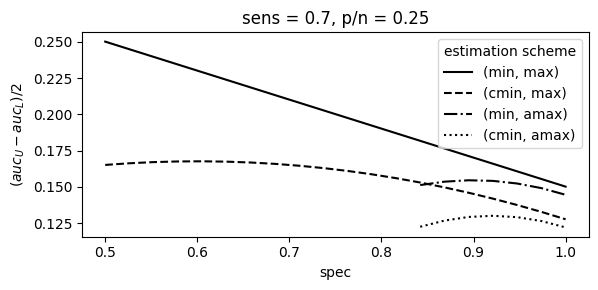

In [37]:
plot(0.7, 200, 800, 'p0.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


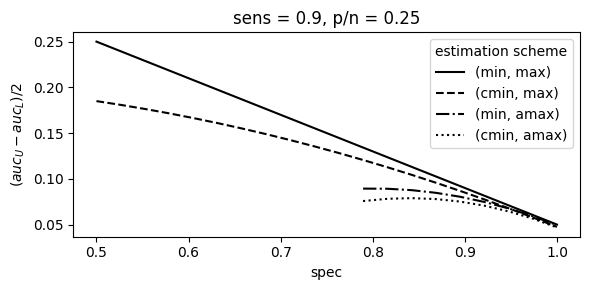

In [38]:
plot(0.9, 200, 800, 'p1.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


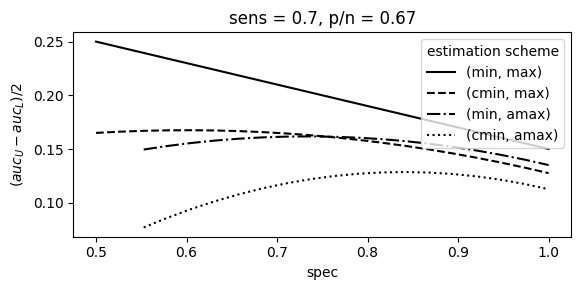

In [39]:
plot(0.7, 400, 600, 'p2.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


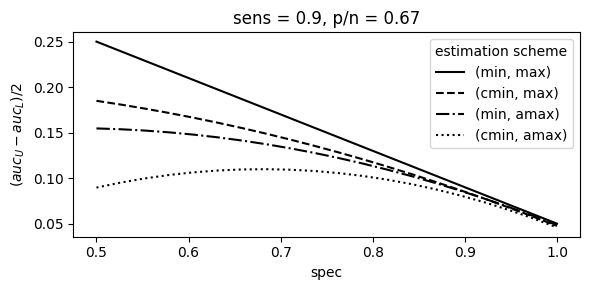

In [40]:
plot(0.9, 400, 600, 'p3.eps')